In [195]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc


In [197]:
df=pd.read_csv("HR-Employee-Attrition.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [242]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
#Handling Binary and Cetegorical Attributes

In [244]:
df['Attrition']=df['Attrition'].replace({'No':0,'Yes':1})

C:\Users\smart\AppData\Local\Temp\ipykernel_6148\3975328196.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Attrition']=df['Attrition'].replace({'No':0,'Yes':1})


In [45]:
df['OverTime']=df['OverTime'].map({'No':0,'Yes':1})
df['Gender']=df['Gender'].map({'Male':0,'Female':1})

In [47]:
df['Over18']=df['Over18'].map({'Y':1,'N':0})

In [49]:
encoder=LabelEncoder()
encode_cols=['BusinessTravel','Department','EducationField','JobRole','MaritalStatus']
lab_encoder={}
for cols in encode_cols:
    lab_encoder[cols]=LabelEncoder()
    df[cols]=lab_encoder[cols].fit_transform(df[cols])

In [51]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   int64
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-null 

In [221]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Text(0.5, 1.0, 'Imbalance distribution')

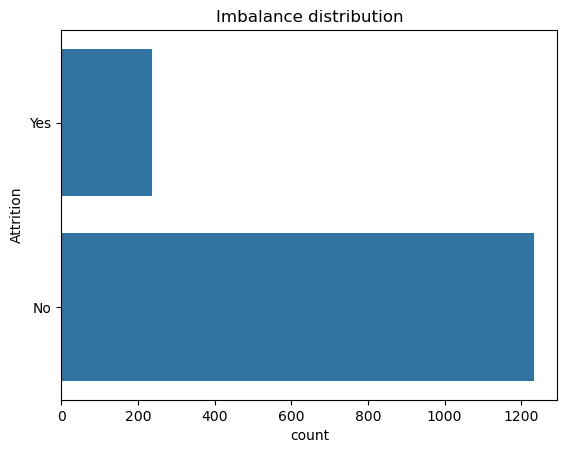

In [232]:
sns.countplot(y=df['Attrition'])
plt.title('Imbalance distribution')

In [73]:

X=df.drop(['Attrition'],axis=1)
y=df['Attrition'].values

In [97]:
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [75]:
#Over Sampling to balance data

In [105]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
print(Counter(y))
ros=RandomOverSampler(random_state=42)
X_over,y_over=ros.fit_resample(X,y)
print(Counter(y_over))

Counter({0: 1233, 1: 237})
Counter({1: 1233, 0: 1233})


In [107]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=42)

classification_report:
                precision    recall  f1-score   support

           0       0.77      0.71      0.74       250
           1       0.72      0.78      0.75       244

    accuracy                           0.74       494
   macro avg       0.74      0.74      0.74       494
weighted avg       0.74      0.74      0.74       494

Accuracy: 0.742914979757085


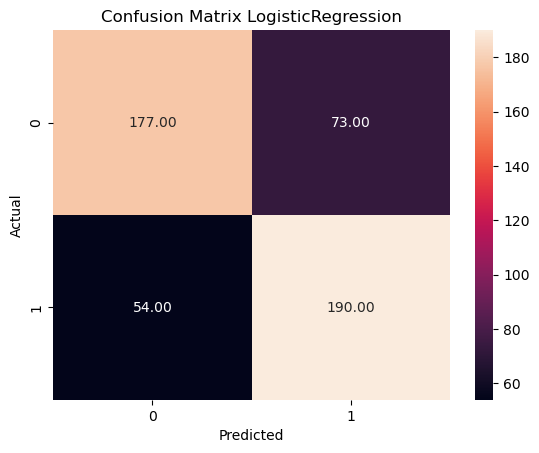

In [179]:
logistic=LogisticRegression()
logistic.fit(X_train,y_train)
log_pred=logistic.predict(X_test)

report=classification_report(y_test,log_pred)
matrix=confusion_matrix(y_test,log_pred)
acc=accuracy_score(y_test,log_pred)
print("classification_report:\n ",report)
print("Accuracy:",acc)
sns.heatmap(matrix,annot=True,fmt='.2f')
plt.title('Confusion Matrix LogisticRegression')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

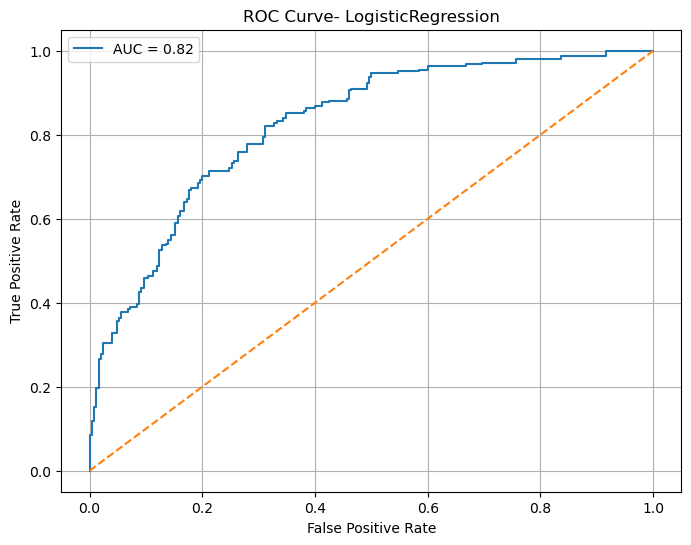

In [193]:
y_scores = logistic.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve- LogisticRegression')
plt.legend()
plt.grid()
plt.show()


classification_report:
                precision    recall  f1-score   support

           0       0.71      0.81      0.76       250
           1       0.77      0.66      0.71       244

    accuracy                           0.74       494
   macro avg       0.74      0.74      0.73       494
weighted avg       0.74      0.74      0.74       494

Accuracy: 0.7368421052631579


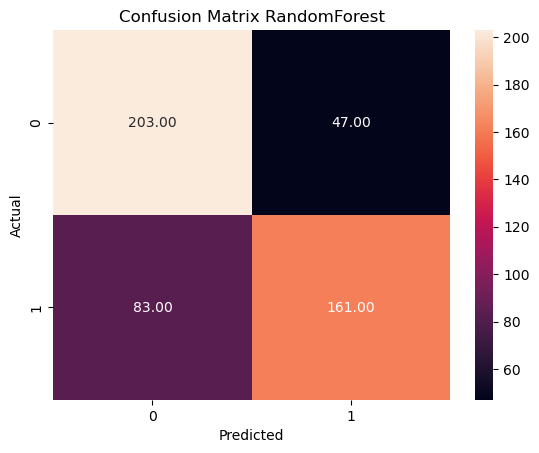

In [183]:
rf=RandomForestClassifier(n_estimators=100,max_depth=3,max_features='log2')
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

report=classification_report(y_test,rf_pred)
matrix=confusion_matrix(y_test,rf_pred)
acc=accuracy_score(y_test,rf_pred)
print("classification_report:\n ",report)
print("Accuracy:",acc)
sns.heatmap(matrix,annot=True,fmt='.2f')
plt.title('Confusion Matrix RandomForest')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

classification_report:
                precision    recall  f1-score   support

           0       0.74      0.82      0.78       250
           1       0.80      0.70      0.75       244

    accuracy                           0.77       494
   macro avg       0.77      0.76      0.76       494
weighted avg       0.77      0.77      0.76       494

Accuracy: 0.7651821862348178


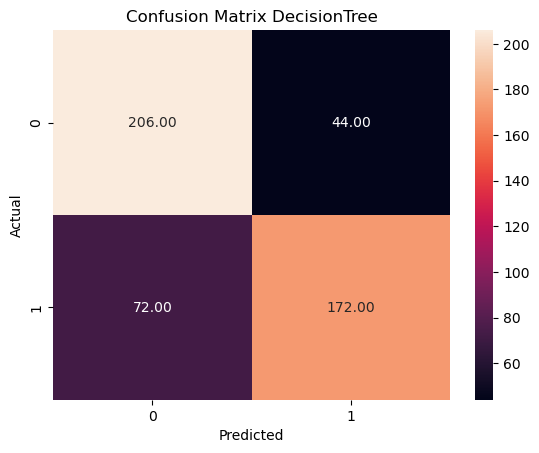

In [185]:
dec_tree = DecisionTreeClassifier(max_depth=5, random_state=42)
dec_tree.fit(X_train, y_train)
dec_tree_preds = dec_tree.predict(X_test)

report=classification_report(y_test,dec_tree_preds)
matrix=confusion_matrix(y_test,dec_tree_preds)
acc=accuracy_score(y_test,dec_tree_preds)
print("classification_report:\n ",report)
print("Accuracy:",acc)
sns.heatmap(matrix,annot=True,fmt='.2f')
plt.title('Confusion Matrix DecisionTree')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
#Final optimal model is Logistic Regression with Recall=0.78, precision=0.72 and accuracy=0.74